<a href="https://colab.research.google.com/github/ocalzada/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/calzada%2C_oscar_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [2]:
# TODO - your code!
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('house-votes-84.data', 
                header=None,
                names=['party', 'handicapped_infants', 'water_project', 'budget',
                       'physician_fee_freeze', 'el_salvador_aid', 'religious_groups', 'anti_satellite_ban',
                      'contras_aid', 'mx_missile', 'immigration', 'synfuels', 'ed_spending',
                       'right_to_sue', 'crime', 'duty_free', 'south_africa'])

df.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,contras_aid,mx_missile,immigration,synfuels,ed_spending,right_to_sue,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.NaN, 'n':0, 'y':1})

In [0]:
rep = df[df.party == 'republican']
dem = df[df.party == 'democrat']

In [45]:
rep.shape

(168, 17)

In [0]:
dem.head()

In [15]:
np.std(rep['handicapped_infants'])

0.3906153465290185

In [0]:
from scipy import stats
from scipy.stats import ttest_ind 

In [0]:
def confidence_interval(data, confidence_level= 0.95):
  data = rep[data]
  sample_mean = np.mean(data)
  sample_size = len(data)
  sample_std_dev = np.std(data, ddof=1)
  standard_error = sample_std_dev / (sample_size**.5)
  margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2.0, sample_size -1)
  return (sample_mean, sample_mean-margin_of_error, sample_mean + margin_of_error)
  
  
#   data = np.array(data)
#   sample_mean = np.mean(data)
#   sample_size = len(data)
#   sample_std_dev = np.std(data, ddof=1)
#   standard_error = sample_std_dev / (sample_size**.5)
#   margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2.0, sample_size - 1)
#   return (sample_mean, sample_mean - margin_of_error, sample_mean + margin_of_error)

In [34]:
confidence_interval('handicapped_infants', confidence_level=0.95)

(0.18787878787878787, 0.12819979769991746, 0.24755777805765827)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


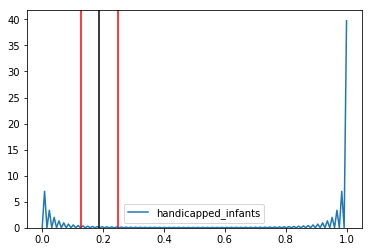

In [50]:
import matplotlib.pyplot as plt

sns.kdeplot(rep['handicapped_infants'])
CI = confidence_interval('handicapped_infants')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')
# sns.kdeplot(coinflips_100)
# CI = confidence_interval(coinflips_100)
# plt.axvline(x=CI[1], color='red')
# plt.axvline(x=CI[2], color='red')
# plt.axvline(x=CI[0], color='k');
plt.show()

##assuming that republicans in Congress are a sample of republicans in the populations, we're 95% confident that our estimate for the mean_value of how republicans in the population would have voted lies between 0.128-0.248 (close to a zero or 'no') on the 'handicapped_infants' bill in Congress.

In [132]:
adult_data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values= ' ?')

adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [133]:
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [134]:
female_count = crosstab.iloc[0][0:2].values
female_count

array([9592, 1179])

In [135]:
male_count = crosstab.iloc[1][0:2].values
male_count

array([15128,  6662])

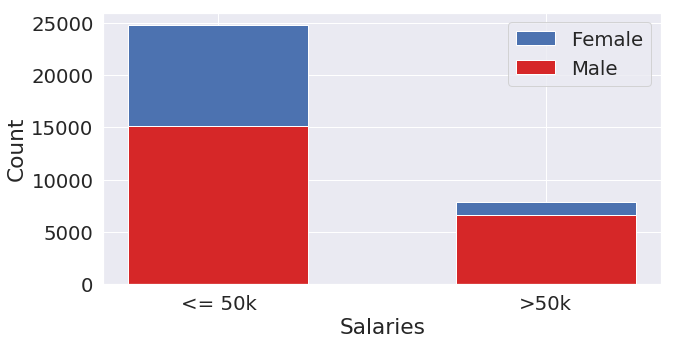

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.8)
categories = ['<= 50k', '>50k']
p1 = plt.bar(categories, male_count, 0.55, color='#d62728')
p2 = plt.bar(categories, female_count, 0.55, bottom=male_count)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Salaries')
plt.ylabel('Count')
plt.show()

# #Plots the bar chart
# fig = plt.figure(figsize=(10, 5))
# sns.set(font_scale=1.8)
# categories = ["0-9","10-19","20-29","30-39","40-49","50+"]

# p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
# p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)

# plt.legend((p2[0], p1[0]), ('Female', 'Male'))
# plt.xlabel('Hours per Week Worked')
# plt.ylabel('Count')
# plt.show()

In [137]:
crosstab = pd.crosstab(adult_data['sex'], adult_data['salary'], margins=True)
crosstab

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [138]:
# expected value calculations
row_sums = crosstab.iloc[0:2, 2].values
columns_sums = crosstab.iloc[2, 0:2].values

print(row_sums)
print(columns_sums)

[10771 21790]
[24720  7841]


In [139]:
total = crosstab.loc['All', 'All']
total

32561

In [140]:
len(adult_data)

32561

In [141]:
expected = []
for i in range(len(row_sums)):
  expected_row =[]
  for column in columns_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [142]:
observed = pd.crosstab(adult_data['sex'], adult_data['salary']).values
print(observed.shape)
observed

(2, 2)


array([[ 9592,  1179],
       [15128,  6662]])

In [143]:
chi_squared = ((observed-expected)**2/(expected)).sum()
print(f"Chi-squared: {chi_squared}")


Chi-squared: 1518.8868199570722


In [144]:
#calculating degrees of freedom
dof = (len(row_sums)-1)*(len(columns_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 1


In [0]:
from scipy.stats import chi2_contingency


In [147]:
expected = stats.chi2_contingency(observed)

print(f"Chi-Square: {chi_squared}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected: \n", np.array(expected))

Chi-Square: 1518.8868199570722
Degrees of Freedom: 1
Expected: 
 [1517.813409134445 0.0 1
 array([[ 8177.24025675,  2593.75974325],
       [16542.75974325,  5247.24025675]])]


In [0]:
# Based on such a high chi-square of 1518, I reject the null hypothesis that the association between 'sex'
# salary is INDEPENDENT and suggest the alternative that there is a dependent association between 'sex'
# salary.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)